In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import seaborn as sns
%matplotlib inline

In [58]:
fname='uber-raw-data-janjune-15.csv'
df=pd.read_csv(fname)
df

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
0,B02617,5/17/2015 9:47,B02617,141
1,B02617,5/17/2015 9:47,B02617,65
2,B02617,5/17/2015 9:47,B02617,100
3,B02617,5/17/2015 9:47,B02774,80
4,B02617,5/17/2015 9:47,B02617,90
...,...,...,...,...
1048570,B02764,5/21/2015 18:07,B02682,52
1048571,B02764,5/21/2015 18:07,B02764,230
1048572,B02764,5/21/2015 18:07,B02788,246
1048573,B02764,5/21/2015 18:07,B02764,107


**scatter plot by uber pick ups**

In [59]:
fname='uber-raw-data-janjune-15.csv'
df=pd.read_csv(fname)
df['Pickup_date']=pd.to_datetime(df['Pickup_date']).dt.date
df= df.groupby(['Pickup_date'])['Pickup_date'].count().reset_index(name = 'pickups')#creating column pickups based on count
print(df)

    Pickup_date  pickups
0    2015-01-01    11172
1    2015-01-02     6733
2    2015-01-03     8090
3    2015-01-05     8492
4    2015-01-06    16425
..          ...      ...
99   2015-06-25     9072
100  2015-06-26     7485
101  2015-06-28     8093
102  2015-06-29     9229
103  2015-06-30     1841

[104 rows x 2 columns]


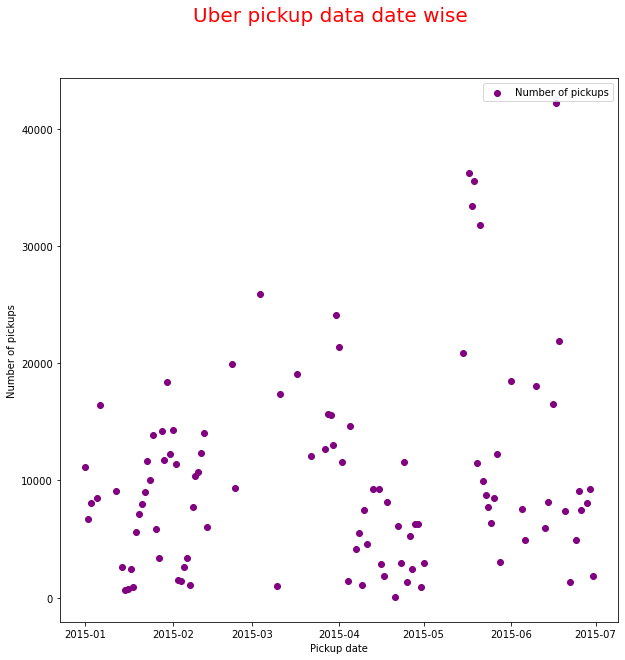

In [60]:
plt.figure(figsize=(10,10))
plt.scatter(x=df['Pickup_date'],y=df['pickups'],color = "purple",label='Number of pickups')
plt.suptitle('Uber pickup data date wise',fontsize=20,color='red') 
plt.xlabel('Pickup date')
plt.ylabel('Number of pickups')
plt.legend()
#ref1:Data 601 Assignment 2

In [61]:
df

,Pickup_date,pickups
0,2015-01-01,11172
1,2015-01-02,6733
2,2015-01-03,8090
3,2015-01-05,8492
4,2015-01-06,16425
...,...,...
99,2015-06-25,9072
100,2015-06-26,7485
101,2015-06-28,8093
102,2015-06-29,9229


**line graph for pickups based on pickup date**

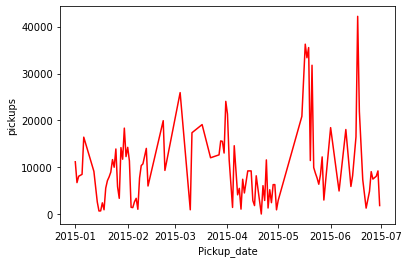

In [62]:
ax=sns.lineplot(x='Pickup_date',y='pickups',color='red',data=df)
#ref2:https://www.youtube.com/watch?v=Pkvdc2Z6eBg&t=379s

In [63]:
fname='uber-raw-data-janjune-15.csv'
df=pd.read_csv(fname)
df= df.groupby(['locationID'])['locationID'].count().reset_index(name = 'pickups')
df

,locationID,pickups
0,1,11
1,3,295
2,4,6576
3,5,3
4,6,42
...,...,...
254,260,1467
255,261,5110
256,262,8429
257,263,9862


**line graph for pickups based on location id date**

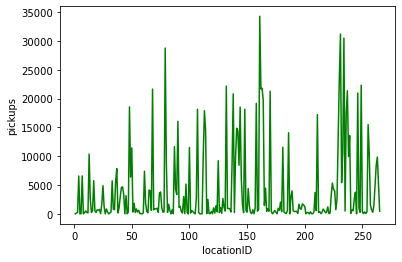

In [64]:
ax=sns.lineplot(x='locationID',y='pickups',color='green',data=df)
#ref2:https://www.youtube.com/watch?v=Pkvdc2Z6eBg&t=379s

**Chaning pickup date to week**

In [65]:
fname='uber-raw-data-janjune-15.csv'
df=pd.read_csv(fname)
df['Pickup_date']=pd.to_datetime(df['Pickup_date']).dt.isocalendar().week #converting date to week
df1= df.groupby(['Pickup_date'])['Pickup_date'].count().reset_index(name = 'pickups')
df1

,Pickup_date,pickups
0,1,25995
1,2,24917
2,3,16472
3,4,65195
4,5,80054
5,6,29018
6,7,53504
7,8,19939
8,9,9335
9,10,25924


**Plotting line graph by week**

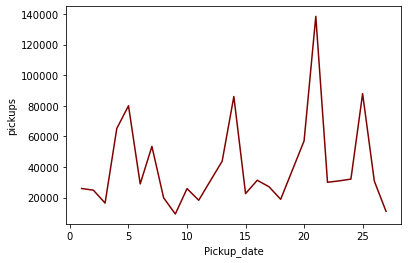

In [66]:
ax=sns.lineplot(x='Pickup_date',y='pickups',color='maroon', data=df1)
#ref2:https://www.youtube.com/watch?v=Pkvdc2Z6eBg&t=379s

**Bar plotting as per pickup in a week**

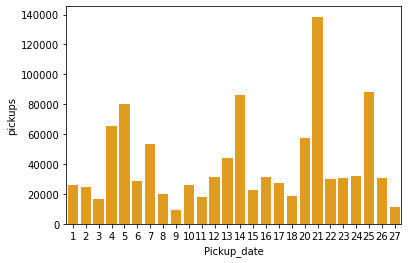

In [67]:
ax=sns.barplot(x='Pickup_date',y='pickups',color='orange', data=df1)
#ref2:https://www.youtube.com/watch?v=Pkvdc2Z6eBg&t=379s

**Bar Plotting Uber Pickups between dates**

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


Text(0, 0.5, 'Number of Pickups')

<Figure size 1440x1440 with 0 Axes>

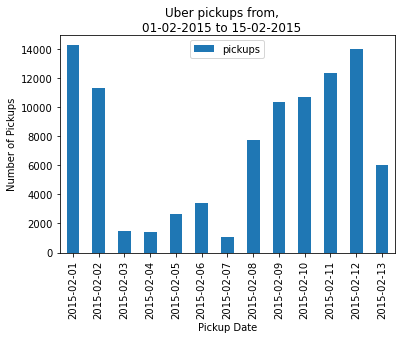

In [68]:
fname='uber-raw-data-janjune-15.csv'
df=pd.read_csv(fname)
start_date=pd.to_datetime('2015-02-01')
end_date=pd.to_datetime('2015-02-15')
df['Pickup_date']=pd.to_datetime(df['Pickup_date']).dt.date #converting into date format
df1= df.groupby(['Pickup_date'])['Pickup_date'].count().reset_index(name = 'pickups')#adding new column as pickups for the count
new_df=(df1['Pickup_date']>=start_date)&(df1['Pickup_date']<=end_date)#assigning Pickup_date for start date and end date
df2=df1.loc[new_df]
df3=df2[['Pickup_date','pickups']]
df4=df3.set_index('Pickup_date')
plt.figure(figsize=(20,20))
df4.plot(kind='bar');#barplotting the data
plt.suptitle('Uber pickups from,\n01-02-2015 to 15-02-2015')
plt.xlabel('Pickup Date')
plt.ylabel('Number of Pickups')
#ref1:Data 601 Assignment 2
#ref2:https://www.youtube.com/watch?v=Pkvdc2Z6eBg&t=379s

**Bar plotting number of pickups based on Pickup date given by the user**

start date for the pickup from jan to 2015: 2015-02-02
end date for the pickup from jan to 2015: 2015-02-14


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


Text(0, 0.5, 'Number of Pickups')

<Figure size 1440x1440 with 0 Axes>

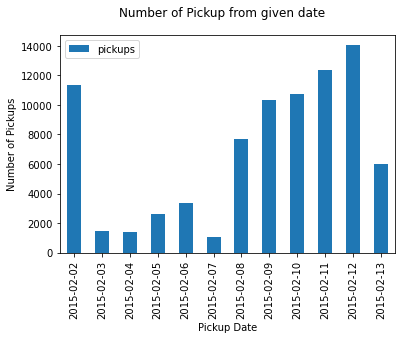

In [69]:
fname='uber-raw-data-janjune-15.csv'
df=pd.read_csv(fname)
x=input("start date for the pickup from jan to 2015: ")
y=input('end date for the pickup from jan to 2015: ')
start_date=pd.to_datetime(x)
end_date=pd.to_datetime(y)
df['Pickup_date']=pd.to_datetime(df['Pickup_date']).dt.date #converting into date format
df1= df.groupby(['Pickup_date'])['Pickup_date'].count().reset_index(name = 'pickups')#adding new column as pickups for the count
new_df=(df1['Pickup_date']>=start_date)&(df1['Pickup_date']<=end_date)#assigning Pickup_date start date and end date
df2=df1.loc[new_df]
df3=df2[['Pickup_date','pickups']]
df4=df3.set_index('Pickup_date')
plt.figure(figsize=(20,20))
df4.plot(kind='bar');#barplotting the data
plt.suptitle('Number of Pickup from given date')
plt.xlabel('Pickup Date')
plt.ylabel('Number of Pickups')
#ref1:Data 601 Assignment 2
#ref2:https://www.youtube.com/watch?v=Pkvdc2Z6eBg&t=379s

**Bar plotting data by pickupdate through seaborn between two given dates**

   Pickup_date  pickups
24  2015-02-01    14254
25  2015-02-02    11360
26  2015-02-03     1467
27  2015-02-04     1404
28  2015-02-05     2644
29  2015-02-06     3383
30  2015-02-07     1046
31  2015-02-08     7714
32  2015-02-09    10367
33  2015-02-10    10730
34  2015-02-11    12366
35  2015-02-12    14031
36  2015-02-13     6010


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


Text(0, 0.5, 'Number of Pickups')

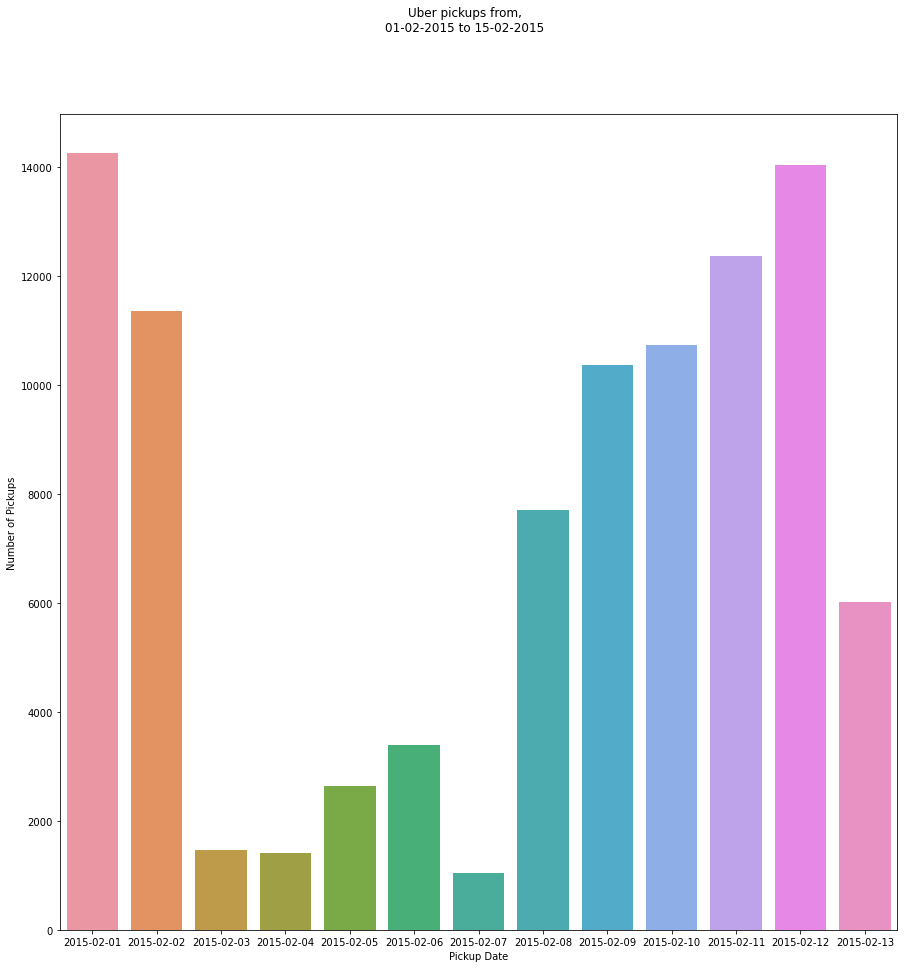

In [70]:
fname='uber-raw-data-janjune-15.csv'
df=pd.read_csv(fname)
start_date=pd.to_datetime('2015-02-01') #giving start date
end_date=pd.to_datetime('2015-02-15')
df['Pickup_date']=pd.to_datetime(df['Pickup_date']).dt.date
df1= df.groupby(['Pickup_date'])['Pickup_date'].count().reset_index(name = 'pickups')
new_df=(df1['Pickup_date']>=start_date)&(df1['Pickup_date']<=end_date)
df2=df1.loc[new_df]
df3=df2[['Pickup_date','pickups']]
df4=df3.set_index('Pickup_date')
print(df3)
plt.figure(figsize=(15,15))
ax=sns.barplot(x="Pickup_date",y='pickups',data=df3)#bar plotting the data using seaborn
plt.suptitle('Uber pickups from,\n01-02-2015 to 15-02-2015')
plt.xlabel('Pickup Date')
plt.ylabel('Number of Pickups')
#ref1:Data 601 Assignment 2
#ref2:https://www.youtube.com/watch?v=Pkvdc2Z6eBg&t=379s

**Histogram Plot using seaborn**

[141  65 100 ... 246 107 100]


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


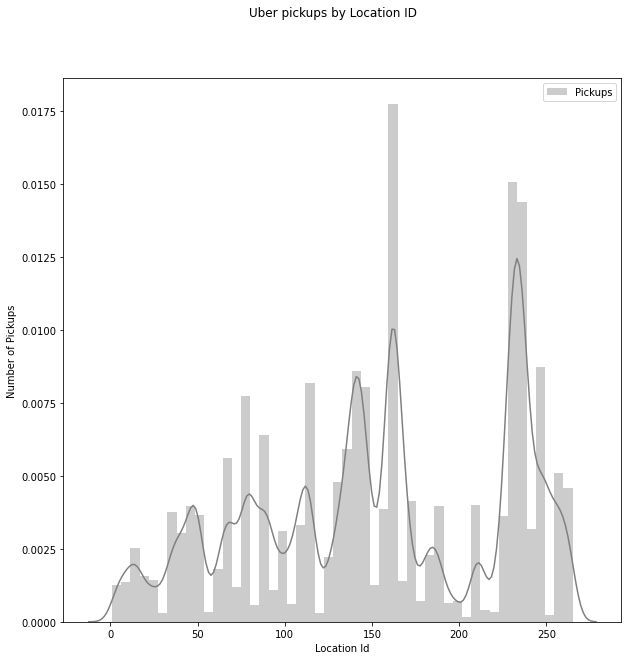

In [71]:
plt.figure(figsize=(10,10))
x=df['locationID'].values
print(x)
sns.distplot(x,color='grey',label='Pickups')#for plotting histogram
plt.suptitle('Uber pickups by Location ID')
plt.xlabel('Location Id')
plt.ylabel('Number of Pickups')
plt.legend()
#ref:https://www.youtube.com/watch?v=Pkvdc2Z6eBg&t=379s

**Boxplot**

[11172  6733  8090  8492 16425  9127  2609   682   696  2421   937  5558
  7156  7947  8979 11640 10009 13906  5862  3381 14204 11720 18353 12280
 14254 11360  1467  1404  2644  3383  1046  7714 10367 10730 12366 14031
  6010 19939  9335 25924   941 17373 19108 12032 12652 15629 15528 13040
 24061 21358 11596  1440 14601  4128  5507  1079  7454  4526  9230  9229
  2901  1836  8188    37  6085  2927 11576  1318  5219  2453  6303  6314
   930  2947 20871 36255 33360 35532 11439 31761  9944  8743  7707  6386
  8456 12215  3016 18459  7579  4948 18055  5912  8180 16481 42192 21918
  7360  1296  4891  9072  7485  8093  9229  1841]
The median of the number of Pickups is : 8322.0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


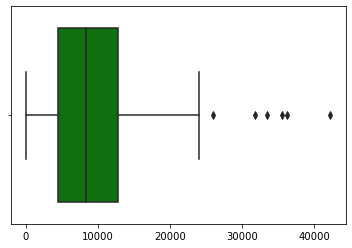

In [72]:
df1= df.groupby(['Pickup_date'])['Pickup_date'].count().reset_index(name = 'pickups')
x=df1['pickups'].values
print(x)
sns.boxplot(x,color='green') #for plotting boxplot
y=df1['pickups'].median()#the middle line in green box represents the median which is 8322
print("The median of the number of Pickups is :",y)
#ref:https://www.youtube.com/watch?v=c5JUJ58p8cQ

**Plotting Scatter Plot using seaborn**

Text(0, 0.5, 'Number of Pickups')

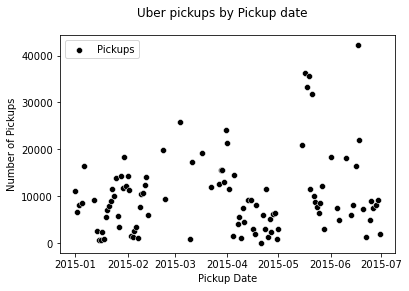

In [73]:
ax=sns.scatterplot(x='Pickup_date',y='pickups',data=df1,label='Pickups',color='black') #for plotting scatter plot
plt.suptitle('Uber pickups by Pickup date')
plt.xlabel('Pickup Date')
plt.ylabel('Number of Pickups')
#ref:https://www.youtube.com/watch?v=c5JUJ58p8cQ

In [74]:
df1

,Pickup_date,pickups
0,2015-01-01,11172
1,2015-01-02,6733
2,2015-01-03,8090
3,2015-01-05,8492
4,2015-01-06,16425
...,...,...
99,2015-06-25,9072
100,2015-06-26,7485
101,2015-06-28,8093
102,2015-06-29,9229


**Subplotting number of pickups based on pickupdates and location id**

<AxesSubplot:ylabel='Count'>

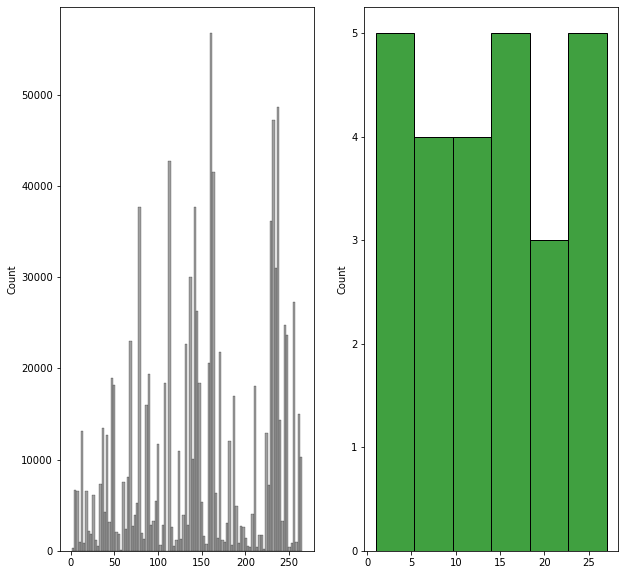

In [75]:
fname='uber-raw-data-janjune-15.csv'
df=pd.read_csv(fname)
fig, axis=plt.subplots(1,2,figsize=(10,10))
x=df['locationID'].values
df['Pickup_date']=pd.to_datetime(df['Pickup_date']).dt.isocalendar().week
df= df.groupby(['Pickup_date'])['Pickup_date'].count().reset_index(name = 'pickups')
a=df['Pickup_date'].values
sns.histplot(x,color='grey',ax=axis[0] )#ax=axis[0] because its one dimensonal
sns.histplot(a,color='green',ax=axis[1])#ax=axis[1] because its one dimensonal
#ref1: Data 601 class dt: 11-03-2022
#ref2:https://www.youtube.com/watch?v=q_66Ehuv6Bk&t=1093s

**Pairplots by using above cell data**

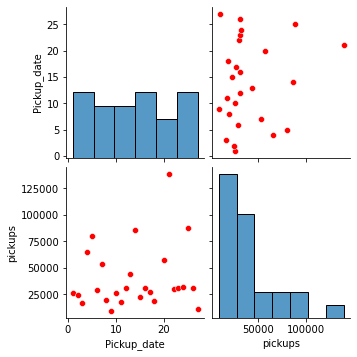

In [76]:
g=sns.pairplot(df,plot_kws={'color':'red'}) #plotting by using pairplot
#ref1:https://www.youtube.com/watch?v=q_66Ehuv6Bk&t=1093s

**Joint plots**

**using Pickup date**

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


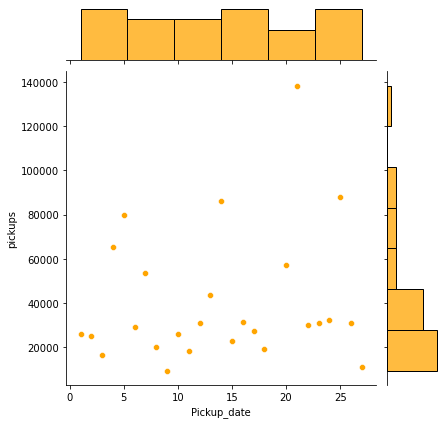

In [77]:
fname='uber-raw-data-janjune-15.csv'
df=pd.read_csv(fname)
df['Pickup_date']=pd.to_datetime(df['Pickup_date']).dt.isocalendar().week
df= df.groupby(['Pickup_date'])['Pickup_date'].count().reset_index(name = 'pickups')
ax=sns.jointplot('Pickup_date','pickups',data=df,color='orange') #for plotting joint plot
#ref1:https://www.youtube.com/watch?v=q_66Ehuv6Bk&t=1093s

**Using Location ID**

        Dispatching_base_num      Pickup_date Affiliated_base_num  locationID
0                     B02617   5/17/2015 9:47              B02617         141
1                     B02617   5/17/2015 9:47              B02617          65
2                     B02617   5/17/2015 9:47              B02617         100
3                     B02617   5/17/2015 9:47              B02774          80
4                     B02617   5/17/2015 9:47              B02617          90
...                      ...              ...                 ...         ...
1048570               B02764  5/21/2015 18:07              B02682          52
1048571               B02764  5/21/2015 18:07              B02764         230
1048572               B02764  5/21/2015 18:07              B02788         246
1048573               B02764  5/21/2015 18:07              B02764         107
1048574               B02764  5/21/2015 18:07              B02764         100

[1048575 rows x 4 columns]


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


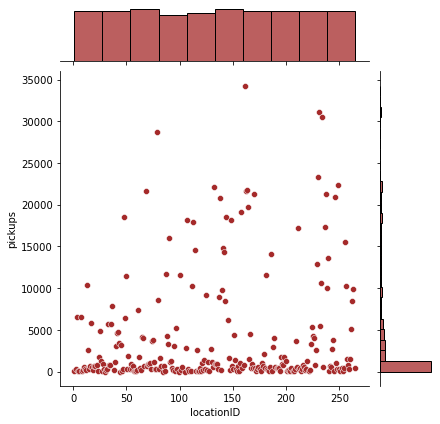

In [78]:
fname='uber-raw-data-janjune-15.csv'
df=pd.read_csv(fname)
print(df)
df= df.groupby(['locationID'])['locationID'].count().reset_index(name = 'pickups')
ax=sns.jointplot('locationID','pickups',data=df,color='brown')
#ref1:https://www.youtube.com/watch?v=q_66Ehuv6Bk&t=1093s

**Heatmap**

**Heatmap for number of pickups based on Location ID**

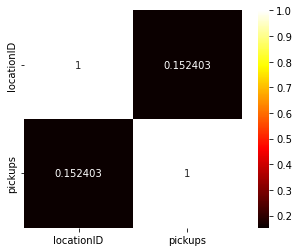

In [79]:
fname='uber-raw-data-janjune-15.csv'
df=pd.read_csv(fname)
df= df.groupby(['locationID'])['locationID'].count().reset_index(name = 'pickups')
a=df[['locationID','pickups']].corr() #finding co-relation between location id and number of pickups
ax=sns.heatmap(a,annot=True, fmt='g',square=True,cmap='hot') #for plotting heatmap
#ref: Data 601 class dt: 11-03-2022
#ref2:https://www.youtube.com/watch?v=q_66Ehuv6Bk&t=1093s

**Heatmap for number of pickups based on pickup pdate**

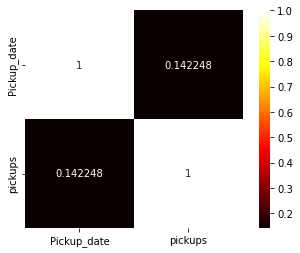

In [80]:
fname='uber-raw-data-janjune-15.csv'
df=pd.read_csv(fname)
df['Pickup_date']=pd.to_datetime(df['Pickup_date']).dt.isocalendar().week
df= df.groupby(['Pickup_date'])['Pickup_date'].count().reset_index(name = 'pickups')
a=df[['Pickup_date','pickups']].corr() #finding co-relation between Pickup date and number of pickups
ax=sns.heatmap(a,annot=True, fmt='g',square=True,cmap='hot')
#ref1: Data 601 class dt: 11-03-2022
#ref2:https://www.youtube.com/watch?v=q_66Ehuv6Bk&t=1093s

**Subplotting heatmap based on number of pickups by location id and pickup date** 

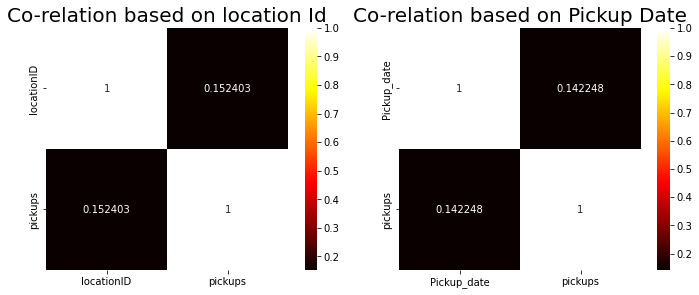

In [81]:
plt.figure(figsize=(10,4))
plt.subplot(121)
fname='uber-raw-data-janjune-15.csv'
df=pd.read_csv(fname)
df= df.groupby(['locationID'])['locationID'].count().reset_index(name = 'pickups')
a=df[['locationID','pickups']].corr()
ax=sns.heatmap(a,annot=True, fmt='g',square=True,cmap='hot')
plt.title('Co-relation based on location Id',fontsize=20)
plt.subplot(122)
fname='uber-raw-data-janjune-15.csv'
df1=pd.read_csv(fname)
df1['Pickup_date']=pd.to_datetime(df1['Pickup_date']).dt.isocalendar().week
df1= df1.groupby(['Pickup_date'])['Pickup_date'].count().reset_index(name = 'pickups')
a=df1[['Pickup_date','pickups']].corr()
ax=sns.heatmap(a,annot=True, fmt='g',square=True,cmap='hot')
plt.title('Co-relation based on Pickup Date',fontsize=20)
plt.tight_layout()
plt.show()
#ref1: Data 601 class dt: 11-03-2022
#ref2:https://www.youtube.com/watch?v=q_66Ehuv6Bk&t=1093s